# 목표
1. test_data를 사전예약 데이터만 이용하려 했으나, 수집한 train_data의 일부 사용

In [1]:
import urllib.request
import time
import numpy as np
import csv
import pandas as pd

from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver
from sklearn.utils import shuffle

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Training_set_label_2")

In [3]:
train_data

,Game title,Url,Genre,Label
0,브롤스타즈,supercell.brawlstars,Action,10
1,모바일 레전드: Bang Bang,mobile.legends,Action,10
2,ROBLOX,roblox.client,Adventure,15
3,클래시 오브 클랜,supercell.clashofclans,Strategy,16
4,배틀그라운드,pubg.krmobile,Action,10
...,...,...,...,...
4329,그림자 기사: 죽음의 모험 RPG,fansipan.stickman.fight.shadow.knights,Action,10
4330,아기돼지 길찾기 대모험,grrr.piglet,Puzzle,8
4331,행성 때리기 3D,redboom.game.shootingstar,Arcade,6
4332,좀비 스위퍼 - 지뢰찾기 액션 퍼즐,arcgamestudio.zombiesweeper,Puzzle,8


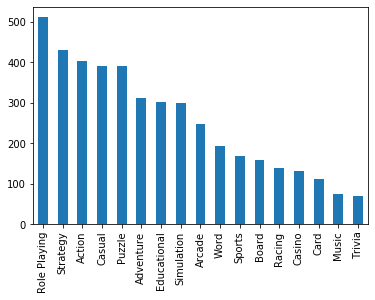

In [4]:
train_data['Genre'].value_counts().plot(kind = 'bar')

- 전체 데이터 개수를 파악하면, Music과 Trivia를 제외하고 모두 100개 이상
- Train_data의 10%를 test_data로 만들자

# Train, Test set 분류

- Train_data의 10%를 test_data으로 생성

In [5]:
test_data = train_data.sample(frac = 0.1)

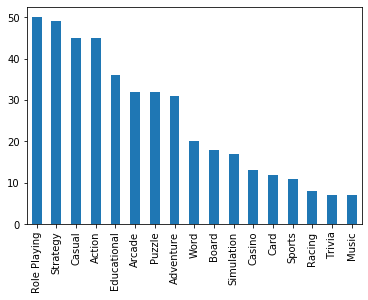

In [6]:
test_data['Genre'].value_counts().plot(kind = 'bar')

10%를 추출해보면 초기 데이터값과 유사함을 알 수 있다. 이 내용들을 test_data로 만들고, 기존 train_data에서 제거하자

In [7]:
test_data.reset_index(drop = True, inplace = True)

In [8]:
test_data

,Game title,Url,Genre,Label
0,A Dance Of Fire and Ice,fizzd.connectedworlds,Music,3
1,월드 오브 탱크 블리츠,net.wargaming.wot.blitz,Strategy,16
2,THE KING OF FIGHTERS '97,snkplaymore.android001,Arcade,6
3,Papa's Taco Mia HD,air.com.flipline.papastacomiahd,Strategy,16
4,Tiledom - Matching Games,games.spearmint.triplecrush,Puzzle,8
...,...,...,...,...
428,Code Adventures : Coding Puzzles For Kids,cyborc.codeadventures,Educational,7
429,"Warhammer 40,000: Regicide",hammerfall.regicide,Strategy,16
430,Jigsaw Puzzles Epic,kristanix.android.jigsawpuzzleepic,Puzzle,8
431,Oz: Broken Kingdom™,nexonm.oz,Action,10


# Train data에서 Test data 제거

In [9]:
imsi = pd.concat([train_data, test_data])

In [10]:
imsi

,Game title,Url,Genre,Label
0,브롤스타즈,supercell.brawlstars,Action,10
1,모바일 레전드: Bang Bang,mobile.legends,Action,10
2,ROBLOX,roblox.client,Adventure,15
3,클래시 오브 클랜,supercell.clashofclans,Strategy,16
4,배틀그라운드,pubg.krmobile,Action,10
...,...,...,...,...
428,Code Adventures : Coding Puzzles For Kids,cyborc.codeadventures,Educational,7
429,"Warhammer 40,000: Regicide",hammerfall.regicide,Strategy,16
430,Jigsaw Puzzles Epic,kristanix.android.jigsawpuzzleepic,Puzzle,8
431,Oz: Broken Kingdom™,nexonm.oz,Action,10


In [11]:
Train_data = imsi.drop_duplicates('Url', keep = False)

In [12]:
Train_data = shuffle(Train_data)

In [13]:
Train_data.reset_index(drop = True, inplace = True)

In [14]:
Train_data

,Game title,Url,Genre,Label
0,Pathos: Nethack Codex,x10host.pathos,Role Playing,11
1,Слова из Слова - Составь,justanothertry.slovavk,Word,4
2,보루의 정복,droidhen.fortconquer,Strategy,16
3,Clay Hunt PRO,aleksirantonen.clayhuntpro,Sports,0
4,"Freerice – Learn, Have Fun, Help End Hunger",freerice.android,Educational,7
...,...,...,...,...
3896,Сканворды на русском,fgcos.scanwords,Word,4
3897,패밀리 아일랜드 - 농장모험게임,MelsoftGames.FamilyIslandFarm,Casual,13
3898,모던 스트라이크 온라인: 3D FPS 사격 게임,gamedevltd.modernstrike,Action,10
3899,Word Search,wordloco.wordchallenge,Word,4


In [15]:
Train_data.to_csv('Train_data', index = False, header = True)
test_data.to_csv('Test_data', index = False, header = True)

이상 구글 플레이스토어 크롤링 후 test_data 만들기 종료